### ÂÆâË£ÖÂíåÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì

In [1]:
# Cell 1: Ëß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫ÈóÆÈ¢òÂíåÂØºÂÖ•Â∫ì
import os
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms
from collections import defaultdict

# Ëß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Â¶ÇÊûú‰∏äÈù¢ÁöÑÂ≠ó‰ΩìÈÉΩ‰∏çÂèØÁî®Ôºå‰ΩøÁî®Ëã±ÊñáÊ†áÈ¢ò
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
random.seed(42)
np.random.seed(42)

### Êï∞ÊçÆÈõÜË∑ØÂæÑËÆæÁΩÆ

In [2]:
train_data_path = "./ml2022spring-hw15/Omniglot/Omniglot/images_background/"
test_data_path = "./ml2022spring-hw15/Omniglot-test/Omniglot-test/"

print("Ê£ÄÊü•Êï∞ÊçÆÈõÜË∑ØÂæÑ...")
print(f"ËÆ≠ÁªÉÈõÜË∑ØÂæÑÂ≠òÂú®: {os.path.exists(train_data_path)}")
print(f"ÊµãËØïÈõÜË∑ØÂæÑÂ≠òÂú®: {os.path.exists(test_data_path)}")

Ê£ÄÊü•Êï∞ÊçÆÈõÜË∑ØÂæÑ...
ËÆ≠ÁªÉÈõÜË∑ØÂæÑÂ≠òÂú®: True
ÊµãËØïÈõÜË∑ØÂæÑÂ≠òÂú®: True


### Ëé∑ÂèñËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑËØ≠Ë®Ä‰ø°ÊÅØ


ÊâæÂà∞ 30 ÁßçËØ≠Ë®Ä:
1. Alphabet_of_the_Magi.0 (20 ‰∏™Â≠óÁ¨¶)
2. Anglo-Saxon_Futhorc.0 (29 ‰∏™Â≠óÁ¨¶)
3. Arcadian.0 (26 ‰∏™Â≠óÁ¨¶)
4. Armenian.0 (41 ‰∏™Â≠óÁ¨¶)
5. Asomtavruli_(Georgian).0 (40 ‰∏™Â≠óÁ¨¶)
6. Balinese.0 (24 ‰∏™Â≠óÁ¨¶)
7. Bengali.0 (46 ‰∏™Â≠óÁ¨¶)
8. Blackfoot_(Canadian_Aboriginal_Syllabics).0 (14 ‰∏™Â≠óÁ¨¶)
9. Braille.0 (26 ‰∏™Â≠óÁ¨¶)
10. Burmese_(Myanmar).0 (34 ‰∏™Â≠óÁ¨¶)
11. Cyrillic.0 (33 ‰∏™Â≠óÁ¨¶)
12. Early_Aramaic.0 (22 ‰∏™Â≠óÁ¨¶)
13. Futurama.0 (26 ‰∏™Â≠óÁ¨¶)
14. Grantha.0 (43 ‰∏™Â≠óÁ¨¶)
15. Greek.0 (24 ‰∏™Â≠óÁ¨¶)
16. Gujarati.0 (48 ‰∏™Â≠óÁ¨¶)
17. Hebrew.0 (22 ‰∏™Â≠óÁ¨¶)
18. Inuktitut_(Canadian_Aboriginal_Syllabics).0 (16 ‰∏™Â≠óÁ¨¶)
19. Japanese_(hiragana).0 (52 ‰∏™Â≠óÁ¨¶)
20. Japanese_(katakana).0 (47 ‰∏™Â≠óÁ¨¶)
21. Korean.0 (40 ‰∏™Â≠óÁ¨¶)
22. Latin.0 (26 ‰∏™Â≠óÁ¨¶)
23. Malay_(Jawi_-_Arabic).0 (40 ‰∏™Â≠óÁ¨¶)
24. Mkhedruli_(Georgian).0 (41 ‰∏™Â≠óÁ¨¶)
25. N_Ko.0 (33 ‰∏™Â≠óÁ¨¶)
26. Ojibwe_(Canadian_Aboriginal_Syllabics).0 (14 ‰∏™Â≠óÁ¨¶)
27. Sanskrit.0 (42 ‰∏™Â≠óÁ¨¶)


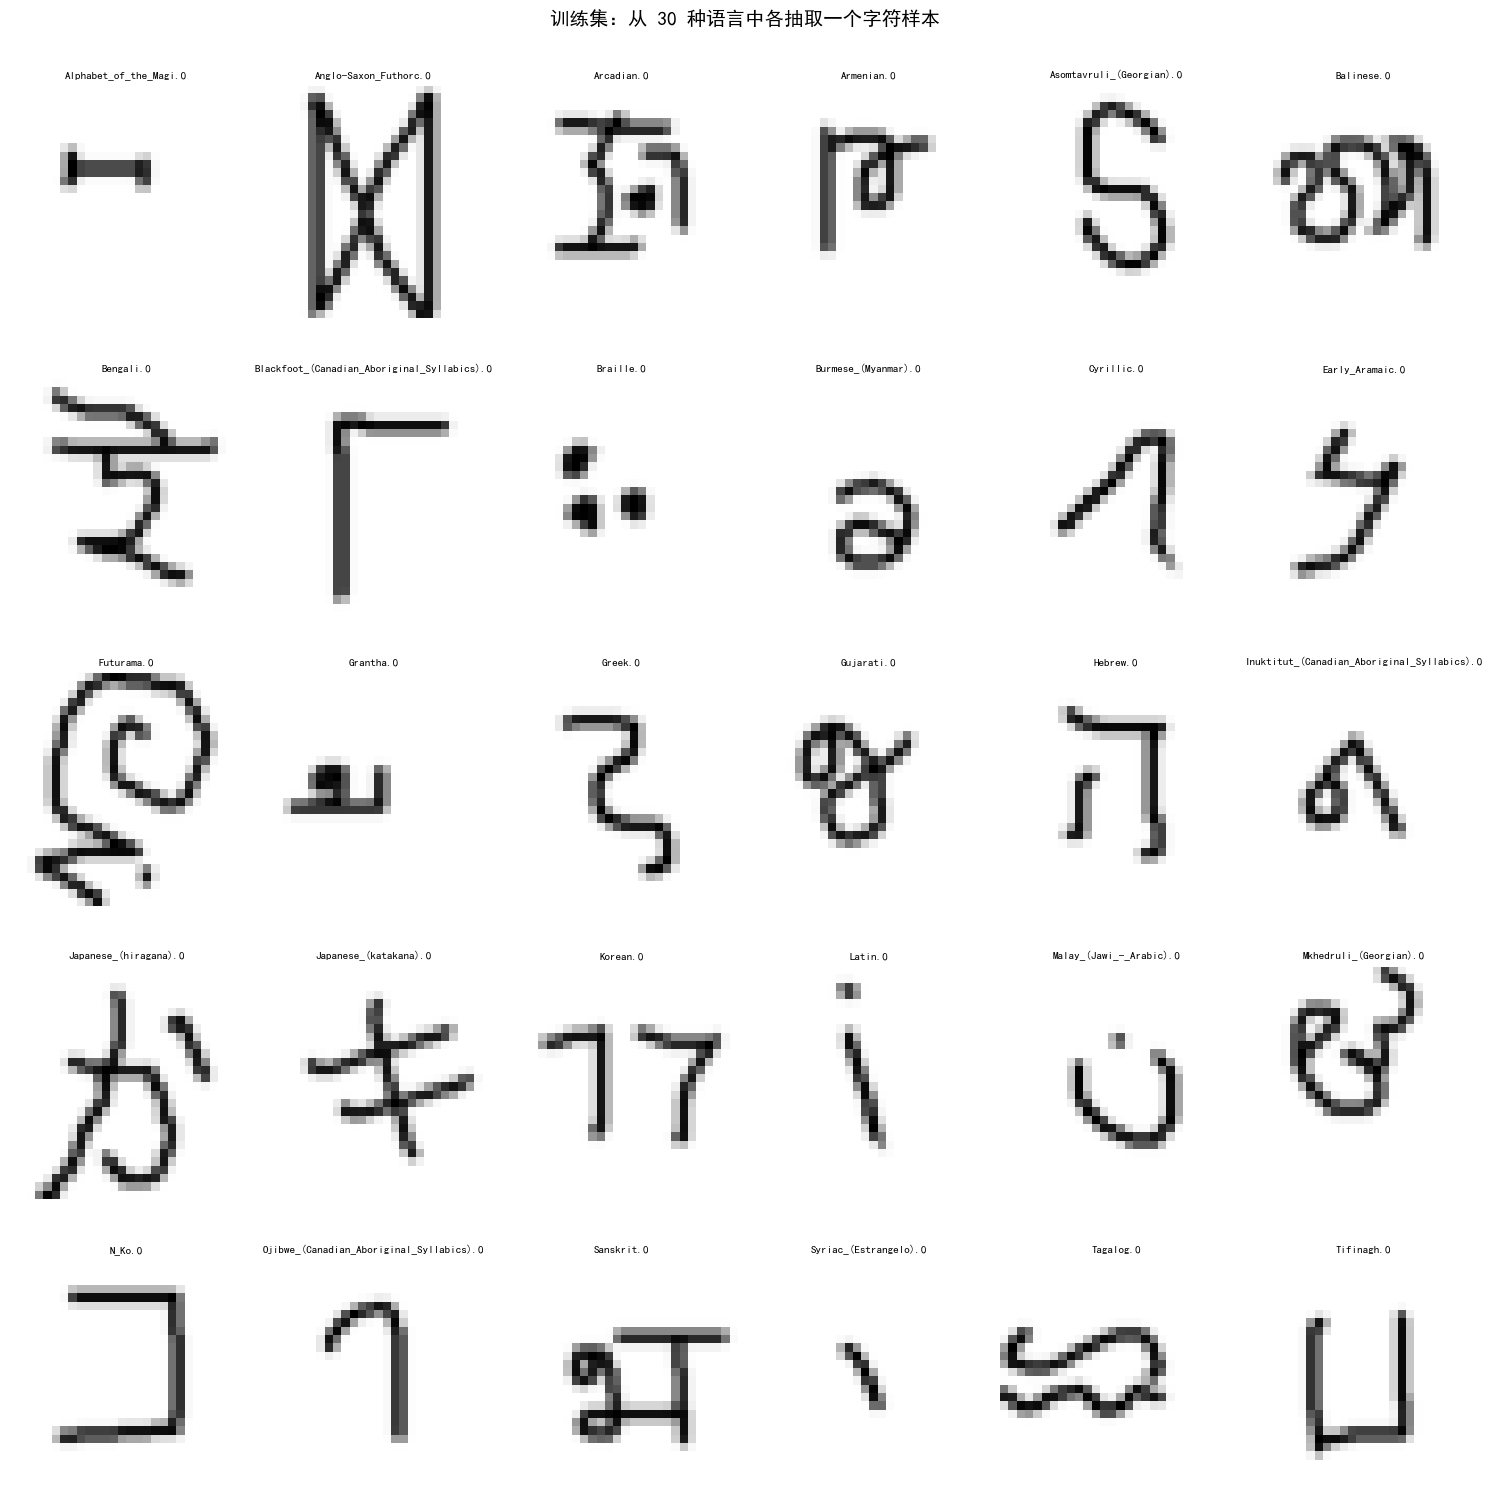

In [3]:
def get_languages_and_characters(data_path):
    """Ëé∑ÂèñÊâÄÊúâËØ≠Ë®ÄÂèäÂÖ∂Â≠óÁ¨¶‰ø°ÊÅØ"""
    languages = {}
    
    # ÈÅçÂéÜÊâÄÊúâËØ≠Ë®ÄÊñá‰ª∂Â§π
    for lang_path in glob.glob(os.path.join(data_path, "*")):
        if os.path.isdir(lang_path):
            lang_name = os.path.basename(lang_path)
            characters = []
            
            # ÈÅçÂéÜËØ•ËØ≠Ë®Ä‰∏ãÁöÑÊâÄÊúâÂ≠óÁ¨¶Êñá‰ª∂Â§π
            for char_path in glob.glob(os.path.join(lang_path, "character*")):
                if os.path.isdir(char_path):
                    characters.append(char_path)
            
            languages[lang_name] = characters
    
    return languages

languages_info = get_languages_and_characters(train_data_path)
print(f"\nÊâæÂà∞ {len(languages_info)} ÁßçËØ≠Ë®Ä:")
for i, lang in enumerate(languages_info.keys()):
    print(f"{i+1}. {lang} ({len(languages_info[lang])} ‰∏™Â≠óÁ¨¶)")

# Cell 4: ‰ªéÊØèÁßçËØ≠Ë®ÄÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨ËøõË°åÂèØËßÜÂåñ
def visualize_languages_samples(languages_info, max_languages=30):
    """‰ªéÊØèÁßçËØ≠Ë®Ä‰∏≠ÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨ËøõË°åÂèØËßÜÂåñ"""
    
    # ÈôêÂà∂ÊòæÁ§∫ÁöÑËØ≠Ë®ÄÊï∞Èáè
    selected_languages = list(languages_info.keys())[:max_languages]
    
    # ËÆ°ÁÆóÂ≠êÂõæÂ∏ÉÂ±Ä
    cols = 6
    rows = (len(selected_languages) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    transform = transforms.Compose([transforms.ToTensor()])
    
    for idx, lang_name in enumerate(selected_languages):
        row = idx // cols
        col = idx % cols
        
        # ÈöèÊú∫ÈÄâÊã©ËØ•ËØ≠Ë®ÄÁöÑ‰∏Ä‰∏™Â≠óÁ¨¶
        characters = languages_info[lang_name]
        if characters:
            selected_char = random.choice(characters)
            
            # Ëé∑ÂèñËØ•Â≠óÁ¨¶ÁöÑÊâÄÊúâÂõæÁâá
            img_files = glob.glob(os.path.join(selected_char, "*.png"))
            if img_files:
                # ÈöèÊú∫ÈÄâÊã©‰∏ÄÂº†ÂõæÁâá
                selected_img = random.choice(img_files)
                
                # Âä†ËΩΩÂíåÊòæÁ§∫ÂõæÁâá
                img = Image.open(selected_img)
                axes[row, col].imshow(img, cmap='gray')
                axes[row, col].set_title(f"{lang_name}", fontsize=8)
                axes[row, col].axis('off')
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for idx in range(len(selected_languages), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"ËÆ≠ÁªÉÈõÜÔºö‰ªé {len(selected_languages)} ÁßçËØ≠Ë®Ä‰∏≠ÂêÑÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨", 
                 fontsize=14, y=1.02)
    plt.show()

# ÂèØËßÜÂåñËØ≠Ë®ÄÊ†∑Êú¨
visualize_languages_samples(languages_info, max_languages=30)

### ‰ªéÊØèÁßçËØ≠Ë®ÄÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨ËøõË°åÂèØËßÜÂåñ

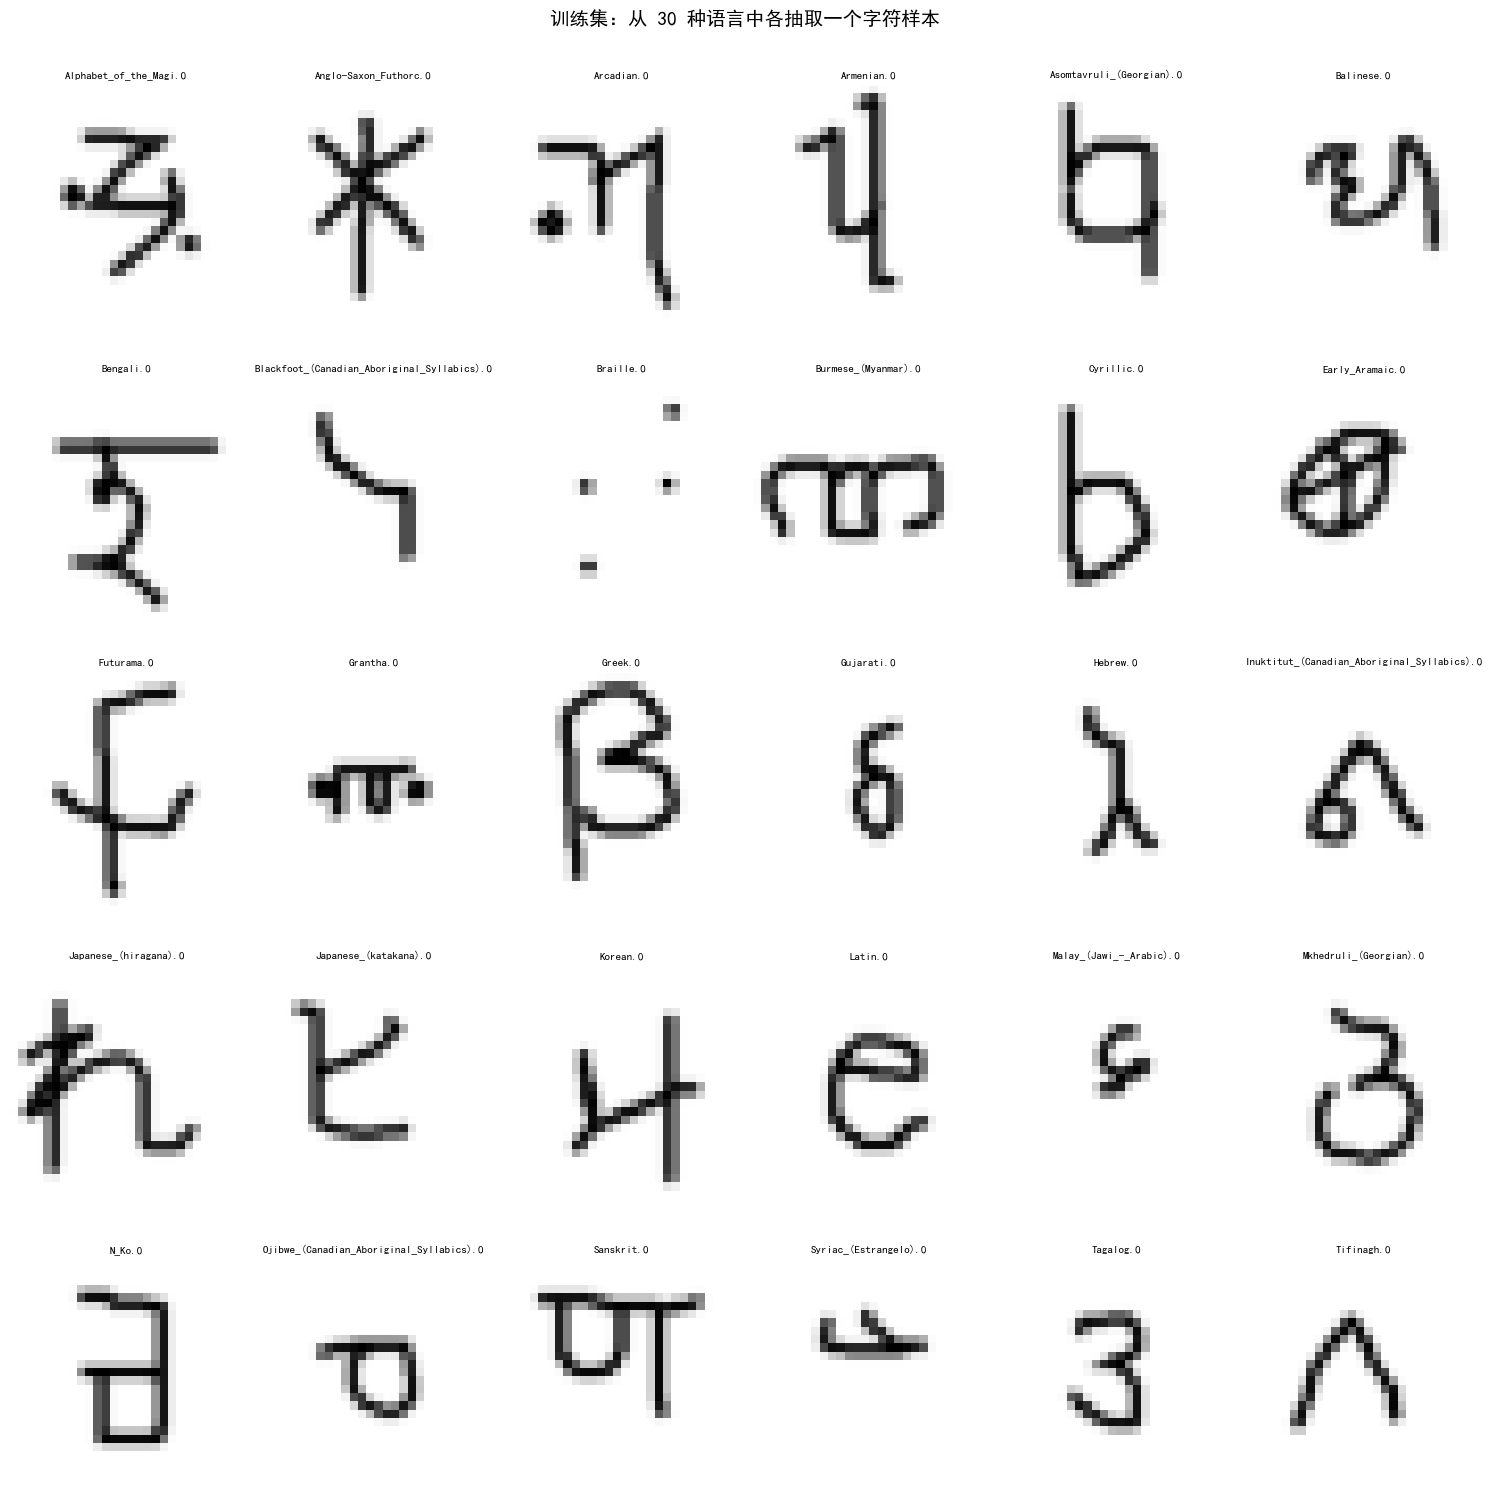

In [4]:
def visualize_languages_samples(languages_info, max_languages=30):
    """‰ªéÊØèÁßçËØ≠Ë®Ä‰∏≠ÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨ËøõË°åÂèØËßÜÂåñ"""
    
    # ÈôêÂà∂ÊòæÁ§∫ÁöÑËØ≠Ë®ÄÊï∞Èáè
    selected_languages = list(languages_info.keys())[:max_languages]
    
    # ËÆ°ÁÆóÂ≠êÂõæÂ∏ÉÂ±Ä
    cols = 6
    rows = (len(selected_languages) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    transform = transforms.Compose([transforms.ToTensor()])
    
    for idx, lang_name in enumerate(selected_languages):
        row = idx // cols
        col = idx % cols
        
        # ÈöèÊú∫ÈÄâÊã©ËØ•ËØ≠Ë®ÄÁöÑ‰∏Ä‰∏™Â≠óÁ¨¶
        characters = languages_info[lang_name]
        if characters:
            selected_char = random.choice(characters)
            
            # Ëé∑ÂèñËØ•Â≠óÁ¨¶ÁöÑÊâÄÊúâÂõæÁâá
            img_files = glob.glob(os.path.join(selected_char, "*.png"))
            if img_files:
                # ÈöèÊú∫ÈÄâÊã©‰∏ÄÂº†ÂõæÁâá
                selected_img = random.choice(img_files)
                
                # Âä†ËΩΩÂíåÊòæÁ§∫ÂõæÁâá
                img = Image.open(selected_img)
                axes[row, col].imshow(img, cmap='gray')
                axes[row, col].set_title(f"{lang_name}", fontsize=8)
                axes[row, col].axis('off')
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for idx in range(len(selected_languages), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"ËÆ≠ÁªÉÈõÜÔºö‰ªé {len(selected_languages)} ÁßçËØ≠Ë®Ä‰∏≠ÂêÑÊäΩÂèñ‰∏Ä‰∏™Â≠óÁ¨¶Ê†∑Êú¨", 
                 fontsize=14, y=1.02)
    plt.show()

# ÂèØËßÜÂåñËØ≠Ë®ÄÊ†∑Êú¨
visualize_languages_samples(languages_info, max_languages=30)


### ÊµãËØïÈõÜÂèØËßÜÂåñÂáΩÊï∞

In [5]:
def visualize_test_samples(test_data_path, num_samples=3):
    """ÂèØËßÜÂåñÊµãËØïÈõÜÁöÑsupportÂíåqueryÊ†∑Êú¨"""
    
    support_path = os.path.join(test_data_path, "support")
    query_path = os.path.join(test_data_path, "query")
    
    if not (os.path.exists(support_path) and os.path.exists(query_path)):
        print("ÊµãËØïÈõÜsupportÊàñqueryÊñá‰ª∂Â§π‰∏çÂ≠òÂú®ÔºÅ")
        return
    
    # Ëé∑ÂèñÊâÄÊúâÊµãËØï‰ªªÂä°ID
    task_ids = sorted([d for d in os.listdir(support_path) 
                      if os.path.isdir(os.path.join(support_path, d))])
    
    print(f"ÊµãËØïÈõÜ‰∏≠ÂÖ±Êúâ {len(task_ids)} ‰∏™‰ªªÂä°")
    
    # ÈöèÊú∫ÈÄâÊã©Âá†‰∏™‰ªªÂä°ËøõË°åÂèØËßÜÂåñ
    selected_tasks = random.sample(task_ids, min(num_samples, len(task_ids)))
    
    for task_idx, task_id in enumerate(selected_tasks):
        print(f"\n‰ªªÂä° {task_id}:")
        
        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        
        # ÊòæÁ§∫support set (‰∏äÊéí)
        support_task_path = os.path.join(support_path, task_id)
        support_images = sorted([f for f in os.listdir(support_task_path) 
                               if f.endswith('.png')])
        
        for i, img_name in enumerate(support_images[:5]):
            img_path = os.path.join(support_task_path, img_name)
            img = Image.open(img_path)
            axes[0, i].imshow(img, cmap='gray')
            axes[0, i].set_title(f"Support {i}", fontsize=10)
            axes[0, i].axis('off')
        
        # ÊòæÁ§∫query set (‰∏ãÊéí)
        query_task_path = os.path.join(query_path, task_id)
        query_images = sorted([f for f in os.listdir(query_task_path) 
                             if f.endswith('.png')])
        
        for i, img_name in enumerate(query_images[:5]):
            img_path = os.path.join(query_task_path, img_name)
            img = Image.open(img_path)
            axes[1, i].imshow(img, cmap='gray')
            axes[1, i].set_title(f"Query {i}", fontsize=10)
            axes[1, i].axis('off')
        
        plt.suptitle(f"ÊµãËØï‰ªªÂä° {task_id}: Support Set (‰∏ä) vs Query Set (‰∏ã)", 
                     fontsize=14)
        plt.tight_layout()
        plt.show()


### ÂèØËßÜÂåñÊµãËØïÈõÜÊ†∑Êú¨

ÊµãËØïÈõÜ‰∏≠ÂÖ±Êúâ 640 ‰∏™‰ªªÂä°

‰ªªÂä° 0163:


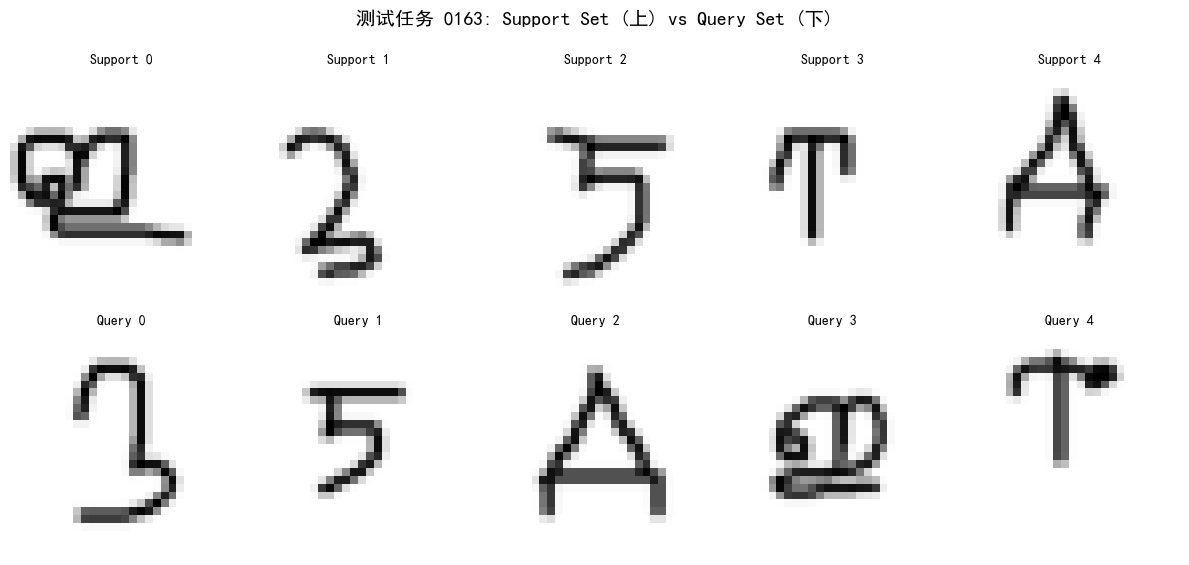


‰ªªÂä° 0432:


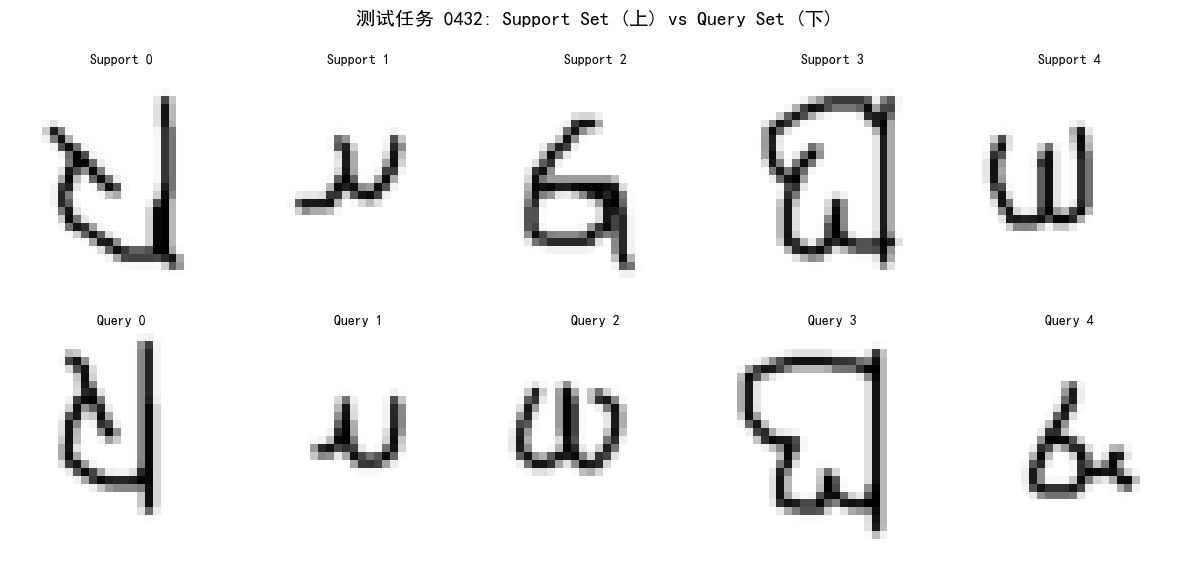


‰ªªÂä° 0610:


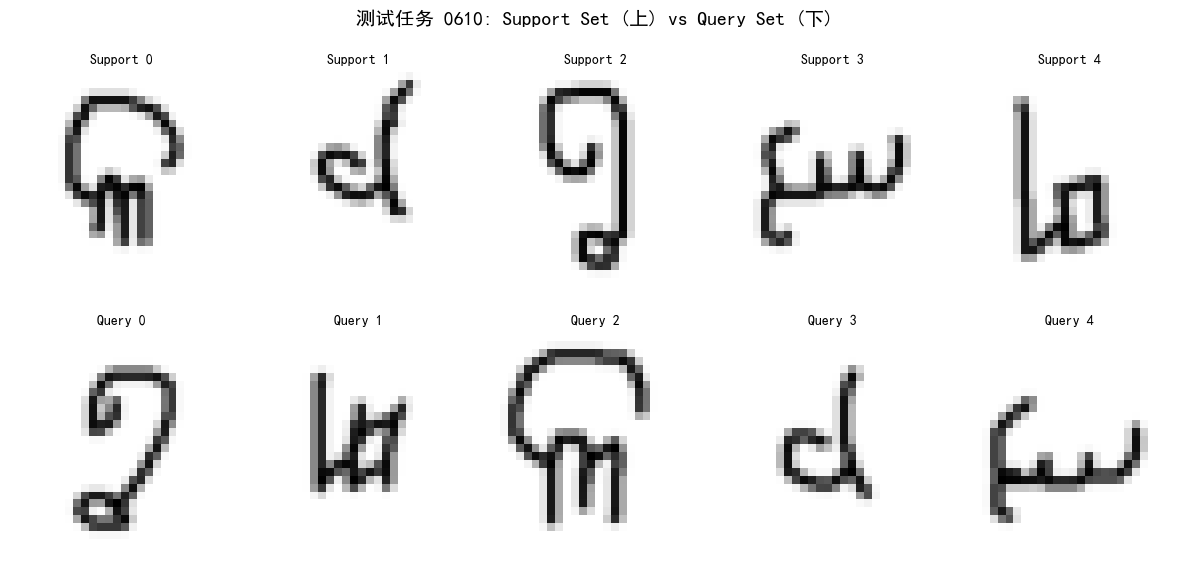

In [6]:
visualize_test_samples(test_data_path, num_samples=3)

### Êï∞ÊçÆÈõÜÁªüËÆ°‰ø°ÊÅØ

In [7]:
def print_dataset_statistics(train_path, test_path):
    """ÊâìÂç∞Êï∞ÊçÆÈõÜÁöÑÁªüËÆ°‰ø°ÊÅØ"""
    print("=" * 50)
    print("OMNIGLOT Êï∞ÊçÆÈõÜÁªüËÆ°‰ø°ÊÅØ")
    print("=" * 50)
    
    # ËÆ≠ÁªÉÈõÜÁªüËÆ°
    languages_info = get_languages_and_characters(train_path)
    total_chars = sum(len(chars) for chars in languages_info.values())
    
    print(f"\nüìö ËÆ≠ÁªÉÈõÜ (images_background):")
    print(f"  - ËØ≠Ë®ÄÊï∞Èáè: {len(languages_info)}")
    print(f"  - Â≠óÁ¨¶ÊÄªÊï∞: {total_chars}")
    
    # ËÆ°ÁÆóÊØè‰∏™Â≠óÁ¨¶ÁöÑÂõæÁâáÊï∞ÈáèÔºàÂÅáËÆæÊØè‰∏™Â≠óÁ¨¶20Âº†ÂõæÁâáÔºâ
    sample_char = list(languages_info.values())[0][0] if languages_info else None
    if sample_char:
        sample_imgs = len(glob.glob(os.path.join(sample_char, "*.png")))
        print(f"  - ÊØè‰∏™Â≠óÁ¨¶ÂõæÁâáÊï∞: {sample_imgs}")
        print(f"  - ÊÄªÂõæÁâáÊï∞: Á∫¶ {total_chars * sample_imgs}")
    
    # ÊµãËØïÈõÜÁªüËÆ°
    support_path = os.path.join(test_path, "support")
    if os.path.exists(support_path):
        test_tasks = len([d for d in os.listdir(support_path) 
                         if os.path.isdir(os.path.join(support_path, d))])
        print(f"\nüîç ÊµãËØïÈõÜ (Omniglot-test):")
        print(f"  - ÊµãËØï‰ªªÂä°Êï∞: {test_tasks}")
        print(f"  - ÊØè‰∏™‰ªªÂä°: 5-way classification")
        print(f"  - Support set: ÊØèÁ±ª1Âº†ÂõæÁâá")
        print(f"  - Query set: ÊØèÁ±ª1Âº†ÂõæÁâá")

print_dataset_statistics(train_data_path, test_data_path)

OMNIGLOT Êï∞ÊçÆÈõÜÁªüËÆ°‰ø°ÊÅØ

üìö ËÆ≠ÁªÉÈõÜ (images_background):
  - ËØ≠Ë®ÄÊï∞Èáè: 30
  - Â≠óÁ¨¶ÊÄªÊï∞: 964
  - ÊØè‰∏™Â≠óÁ¨¶ÂõæÁâáÊï∞: 20
  - ÊÄªÂõæÁâáÊï∞: Á∫¶ 19280

üîç ÊµãËØïÈõÜ (Omniglot-test):
  - ÊµãËØï‰ªªÂä°Êï∞: 640
  - ÊØè‰∏™‰ªªÂä°: 5-way classification
  - Support set: ÊØèÁ±ª1Âº†ÂõæÁâá
  - Query set: ÊØèÁ±ª1Âº†ÂõæÁâá


### ÂàõÂª∫‰∏Ä‰∏™‰∫§‰∫íÂºèÁöÑÂ≠óÁ¨¶Êü•ÁúãÂô®

In [8]:
def interactive_character_viewer(languages_info, language_name=None):
    """‰∫§‰∫íÂºèÊü•ÁúãÁâπÂÆöËØ≠Ë®ÄÁöÑÊâÄÊúâÂ≠óÁ¨¶"""
    
    if language_name is None:
        print("ÂèØÁî®ÁöÑËØ≠Ë®Ä:")
        for i, lang in enumerate(languages_info.keys()):
            print(f"{i+1}. {lang}")
        return
    
    if language_name not in languages_info:
        print(f"ËØ≠Ë®Ä '{language_name}' ‰∏çÂ≠òÂú®ÔºÅ")
        return
    
    characters = languages_info[language_name]
    print(f"\nÊòæÁ§∫ËØ≠Ë®Ä '{language_name}' ÁöÑÊâÄÊúâÂ≠óÁ¨¶ (ÂÖ± {len(characters)} ‰∏™):")
    
    # ËÆ°ÁÆóÂ∏ÉÂ±Ä
    cols = 8
    rows = (len(characters) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 2*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, char_path in enumerate(characters):
        row = idx // cols
        col = idx % cols
        
        # Ëé∑ÂèñËØ•Â≠óÁ¨¶ÁöÑÁ¨¨‰∏ÄÂº†ÂõæÁâá
        img_files = glob.glob(os.path.join(char_path, "*.png"))
        if img_files:
            img = Image.open(img_files[0])
            axes[row, col].imshow(img, cmap='gray')
            char_name = os.path.basename(char_path)
            axes[row, col].set_title(char_name, fontsize=8)
            axes[row, col].axis('off')
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for idx in range(len(characters), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.suptitle(f"ËØ≠Ë®Ä: {language_name} (ÊâÄÊúâÂ≠óÁ¨¶)", fontsize=14)
    plt.tight_layout()
    plt.show()

### Á§∫‰æãÔºöÊü•ÁúãÊüê‰∏™ÁâπÂÆöËØ≠Ë®ÄÁöÑÊâÄÊúâÂ≠óÁ¨¶
### ÂèñÁ¨¨‰∏Ä‰∏™ËØ≠Ë®Ä‰Ωú‰∏∫Á§∫‰æã


Á§∫‰æãÔºöÊü•ÁúãËØ≠Ë®Ä 'Japanese_(hiragana).0' ÁöÑÊâÄÊúâÂ≠óÁ¨¶

ÊòæÁ§∫ËØ≠Ë®Ä 'Japanese_(hiragana).0' ÁöÑÊâÄÊúâÂ≠óÁ¨¶ (ÂÖ± 52 ‰∏™):


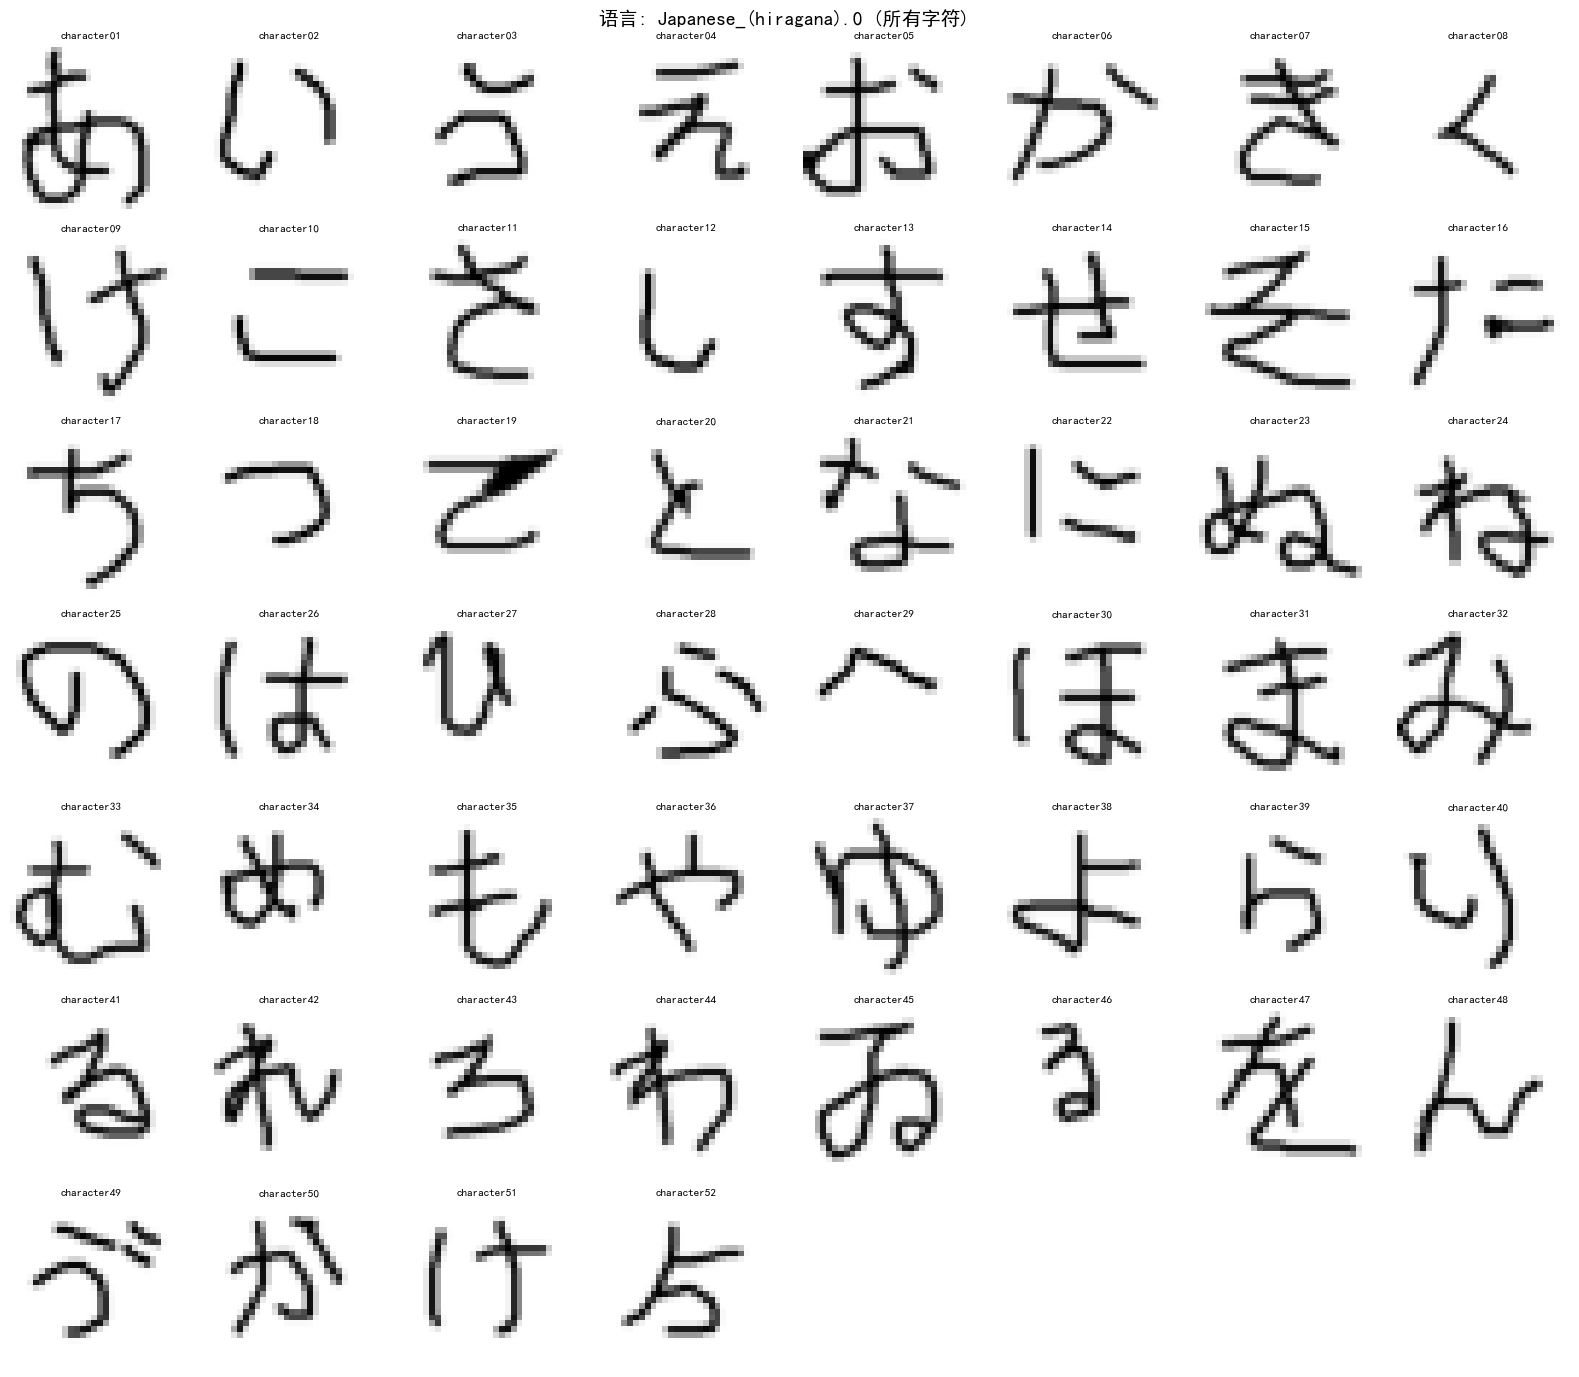

In [11]:
if languages_info:
    first_language = list(languages_info.keys())[18]
    print(f"\nÁ§∫‰æãÔºöÊü•ÁúãËØ≠Ë®Ä '{first_language}' ÁöÑÊâÄÊúâÂ≠óÁ¨¶")
    interactive_character_viewer(languages_info, first_language)